In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [2]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-1

In [3]:
from ISLP import load_data
from ISLP.models import(ModelSpec as MS, summarize, poly)
Carseats = load_data('Carseats')

# Question 10

This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [ ]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [ ]:
Carseats.dropna()
Carseats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [ ]:
Carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
datatypes = {
    'quant': ['Sales', 'CompPrice','Income','Advertising','Population','Price','Age','Education'],
    'qual': ['ShelveLoc', 'Urban','US']
}
quants = Carseats[datatypes['quant']].astype('float')
carseats_df = pd.concat([quants,Carseats[datatypes['qual']]], axis = 1)
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,Bad,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,Good,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,Medium,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,Medium,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,Bad,Yes,No


In [ ]:
f = 'Sales ~ Price + C(Urban) + C(US)'
y,X = patsy.dmatrices(f, carseats_df, return_type ='dataframe' )
model = sm.OLS(y,X).fit()
print(model.summary())
y_pred = np.array(model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.39e-23
Time:                        18:03:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

In [ ]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
c = Carseats.copy()
ShelveLoc = {'Bad':0, 'Medium' :1, 'Good':2}
yesNo = {'Yes':1, 'No' :0}
c['ShelveLoc'] = c['ShelveLoc'].map(ShelveLoc)
c['US'] = c['US'].map(yesNo)
c['Urban'] = c['Urban'].map(yesNo)
c.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
cat = ['US', 'ShelveLoc', 'Urban']
c['Urban'] = c['Urban'].astype(int)
c['US'] = c['US'].astype(int)
c['ShelveLoc'] = c['ShelveLoc'].astype(int)
c.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [ ]:
newF = 'Sales ~ Price + Urban + US'
rTry2 = smf.ols(newF, data = c).fit()
rTry2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.39e-23
Time:                        18:03:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

1)Price - The more expensive the object the less it will sell for. This is a solid variable since the P value is low.
2)Urban - Means if the location is Urban or not. If it is urban then it will decrease the sale since coef is negative. However the p value is low, so we need to investiage this variable into more consideration.
3)US - if the object is from the US then it will increase the sale since the coef is positive. This has a low p value so it is likely relevant.

# **(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

Sales = 13.0435 + Price X -0.0545 + Urban X -0.219 + US X 1.2006

# **(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?**
The F statistic is high so we can reject the null. The p value is high for Urban. So we can reject it for US and Price.


In [ ]:
newnewF = 'Sales ~ US + Price'
r = smf.ols(newnewF, data = c).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.66e-24
Time:                        18:03:08   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US             1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

The R^2 value is the same so the model hasn't approved its accuracy. But it shows that Urban was not relevant to the models accuracy. Therefore it is better that it is removed.


# **(f) How well do the models in (a) and (e) ft the data?**
Answered above in (e)

# **(g) Using the model from (e), obtain 95 % confdence intervals for the coefcient(s).**

We can see the itervals from the summary.

Price is [-0.065, -0.044]


US is [-0.692, 1.708]


# **(f) Is there evidence of outliers or high leverage observations in the model from (e)?**



Text(0.5, 1.0, 'Residuals X Fittedvalues')

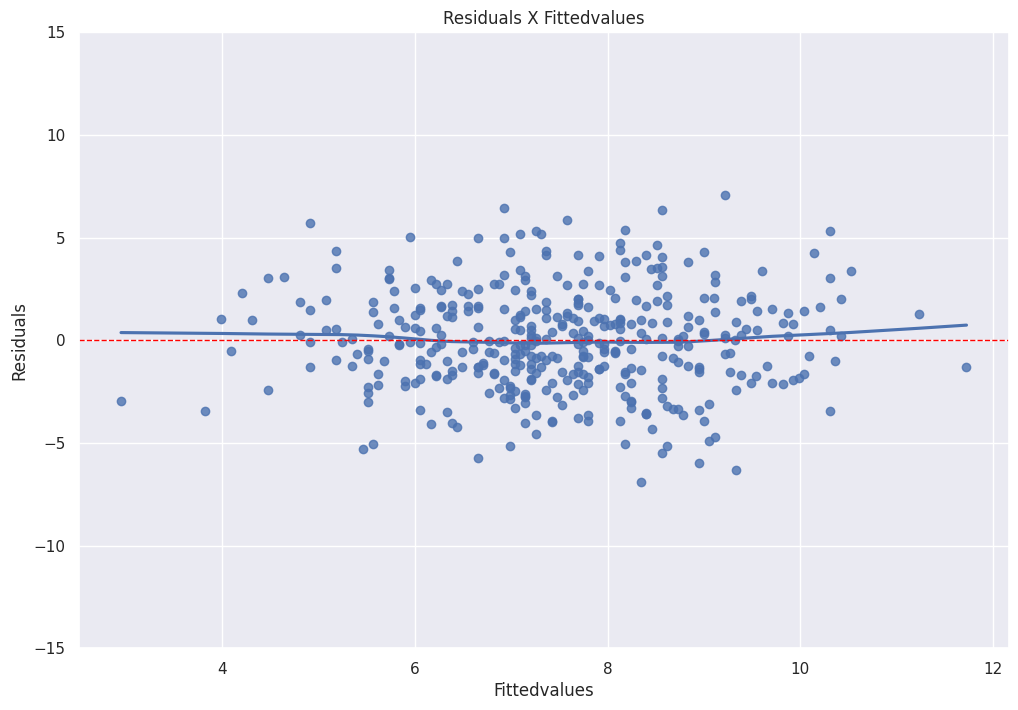

In [ ]:
plt.figure(figsize = (12,8))
plt.ylim(-15,15)
sns.regplot(x = r.fittedvalues, y = r.resid, lowess = True)
plt.axhline(y = 0, linewidth = 1.0, linestyle = 'dashed', color = 'red')
plt.xlabel('Fittedvalues')
plt.ylabel('Residuals')
plt.title('Residuals X Fittedvalues')


The residuals seems to be relatively close together in a linear fashion with limited outliers!

Text(0.5, 1.0, 'Leverage for x Values')

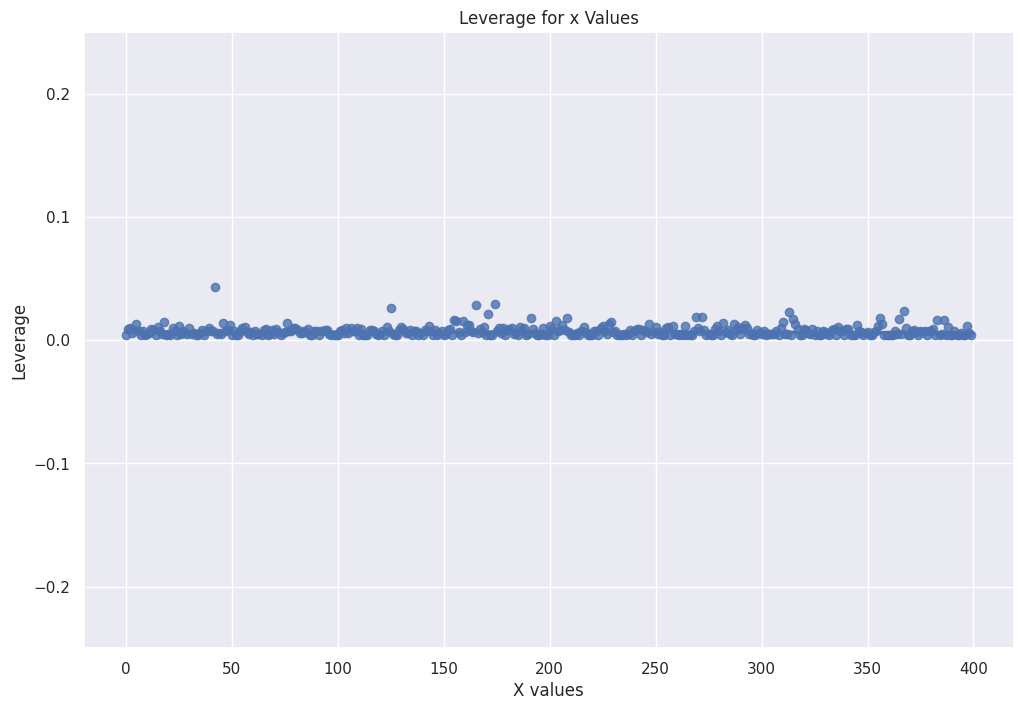

In [ ]:
plt.figure(figsize=(12,8))
infl = r.get_influence()
plt.ylim(-.25,.25)
sns.regplot(x = np.arange(X.shape[0]), y =infl.hat_matrix_diag, lowess = True)
plt.xlabel("X values")
plt.ylabel("Leverage")
plt.title("Leverage for x Values")

We can see from the above graph there is very little leverage. The data from this data set is relatively accurate in terms of outliers and high leverage.

### Question 11
 In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.



```
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
```

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefcient estimate βˆ, the standard error of
this coefcient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)


In [ ]:
results1 = sm.OLS(x,y).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        18:03:15   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results
Coef is .3757 and the std err is 0.22 with a low p value. The t statistic is 16.898.

**(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefcient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results**


In [ ]:
results2 = sm.OLS(y,x).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        18:03:17   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**
>
The coef is much large being 1.97 and the std err is also large at .117. The t statistic is the same tho and the p value is the same. The R^2 for both is the same also. WE can reject the null hypothesis for both

# (c) What is the relationship between the results obtained in (a) and (b)?
>
We can see that they both have the same t and p value, but different coef and std error.

# (d) Show algebraically, and confrm numerically in R, that the t-statistic can be written a
Did it on scratch paper




# (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

The equation will not change if you switch x and y. Therefore the result will stay the same. It is mirrored for x and y

# (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.


In [ ]:
data = pd.DataFrame({'X':x, 'y': y})
r1= smf.ols('X ~ y', data = data ).fit()
print(r1.summary())
r2=smf.ols('y ~ X', data = data).fit()
print(r2.summary())



                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.74e-30
Time:                        18:03:21   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0095      0.044      0.216      0.8

You can see they have the same R^2 and Adj R along with the t value and p value!

# Question 12


# This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X

Answer: When the summation of Xi equals the summation of Yi.

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.


<Axes: >

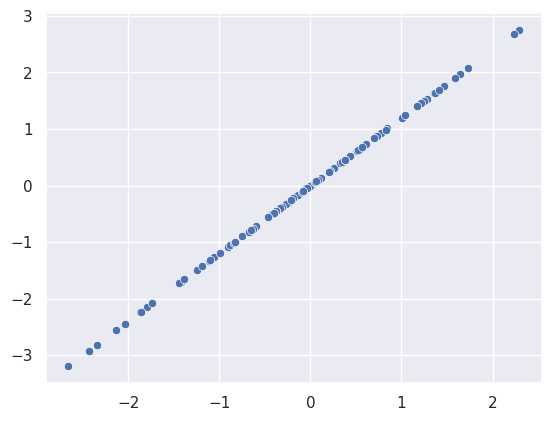

In [ ]:
np.random.seed(2)
X = np.random.normal(size = 100)
y = 1.2 * X
df = pd.DataFrame({'X': X, 'y':y})
sns.scatterplot(x = X, y= y)

In [ ]:
r1 = sm.OLS(X,y).fit()
r2 = sm.OLS(y,X).fit()
print(r1.summary(), r2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.177e+33
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:18:30   Log-Likelihood:                          3431.6
No. Observations:                 100   AIC:                                     -6861.
Df Residuals:                      99   BIC:                                     -6859.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coef are different as X onto y is .833 and y onto X is 1.2. It is shown that the p values are the same as expected but the t values differ

(c) Generate an example in Python with n = 100 observations in
which the coefcient estimate for the regression of X onto Y is
the same as the coefcient estimate for the regression of Y onto
X.

In [ ]:
X = np.random.normal(size = 100)
y = X
r1 = sm.OLS(X,y).fit()
r2 = sm.OLS(y,X).fit()
print(r1.summary(), r2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.040e+33
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:22:05   Log-Likelihood:                          3452.2
No. Observations:                 100   AIC:                                     -6902.
Df Residuals:                      99   BIC:                                     -6900.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Hence as predict when X=y then their coefficents are equal as predicted above based on the 3.38 formula for B hat.

# Question 13

In this exercise you will create some simulated data and will ft simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [ ]:
np.random.seed(1)
X = np.random.normal(loc = 0, scale = 1, size = 100)

(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25

In [ ]:
eps = np.random.normal(loc = 0, scale =0.25, size = 100)

(c) Using x and eps, generate a vector y according to the model


Y = −1 + 0.5X + eps. (3.39)


What is the length of the vector y? What are the values of β0
and β1 in this linear model?

Answer: Bo is -1 which is the intercept. B1 is 0.5.

In [ ]:
Y = -1 + 0.5 * X + eps

In [ ]:

Y.size
#This is the length of Y

1.8176568332347607


100

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

Text(0.5, 1.0, 'X vs Y')

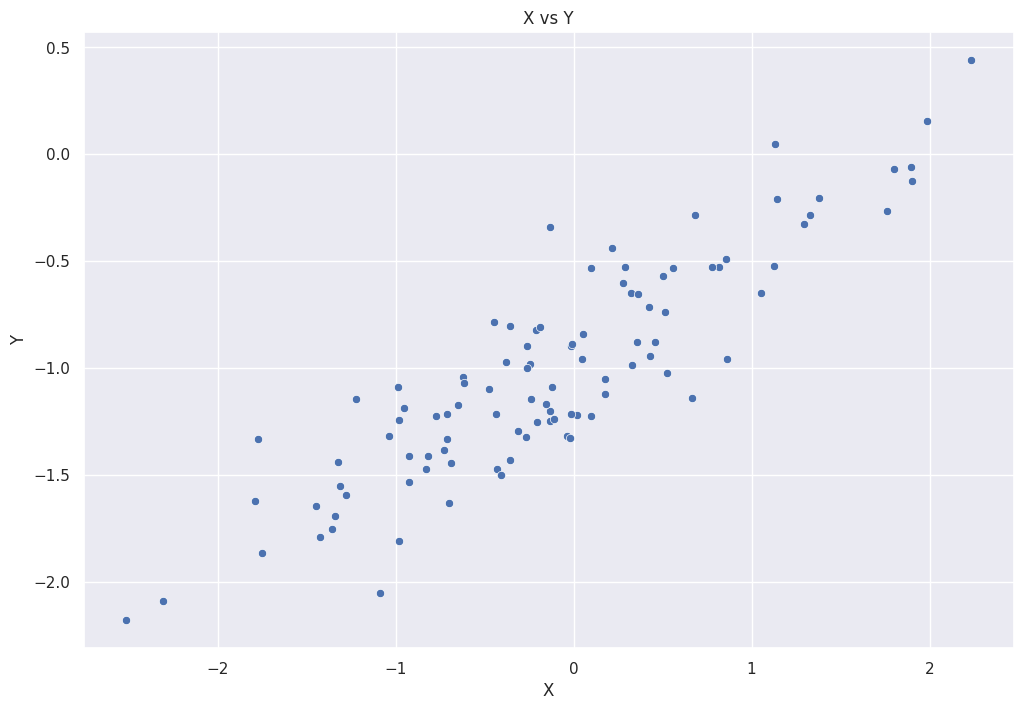

In [ ]:
X = np.random.normal(loc = 0, scale = 1, size = 100)
eps = np.random.normal(loc = 0, scale =0.25, size = 100)
Y = -1 + 0.5 * X + eps
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = X, y = Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

The relationship is rather linear as X grows so does Y with a similar term coef. It appears the coef is around 0.5 and the intercept is -1.0

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?

In [ ]:
X = sm.add_constant(X)
results = sm.OLS(X,Y).fit()

results.params


array([[-0.84673404,  0.26647869]])

The test B0 is similar to the BO from the graph only different by -.2.

Likewise the test B1 is relatively close to B1 from the graph. Also differing by .2

In [ ]:
X = np.random.normal(loc = 0, scale = 1, size = 100)
eps = np.random.normal(loc = 0, scale =0.25, size = 100)
Y = -1 + 0.5 * X + eps
model = smf.ols('Y ~ X', data = pd.DataFrame({'x': X, 'y': Y})).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     481.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.29e-39
Time:                        19:03:32   Log-Likelihood:                -6.8758
No. Observations:                 100   AIC:                             17.75
Df Residuals:                      98   BIC:                             22.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.027    -38.899      0.000      -1.085      -0.980
X              0.5069      0.023     21.953      0.000       0.461       0.553
==============================================================================
Omnibus:                        2.975   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.729
Skew:                          -0.323   Prob(JB):                        0.255
Kurtosis:                       2.512   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a diferent
color. Use the legend() method of the axes to create an appropriate legend.

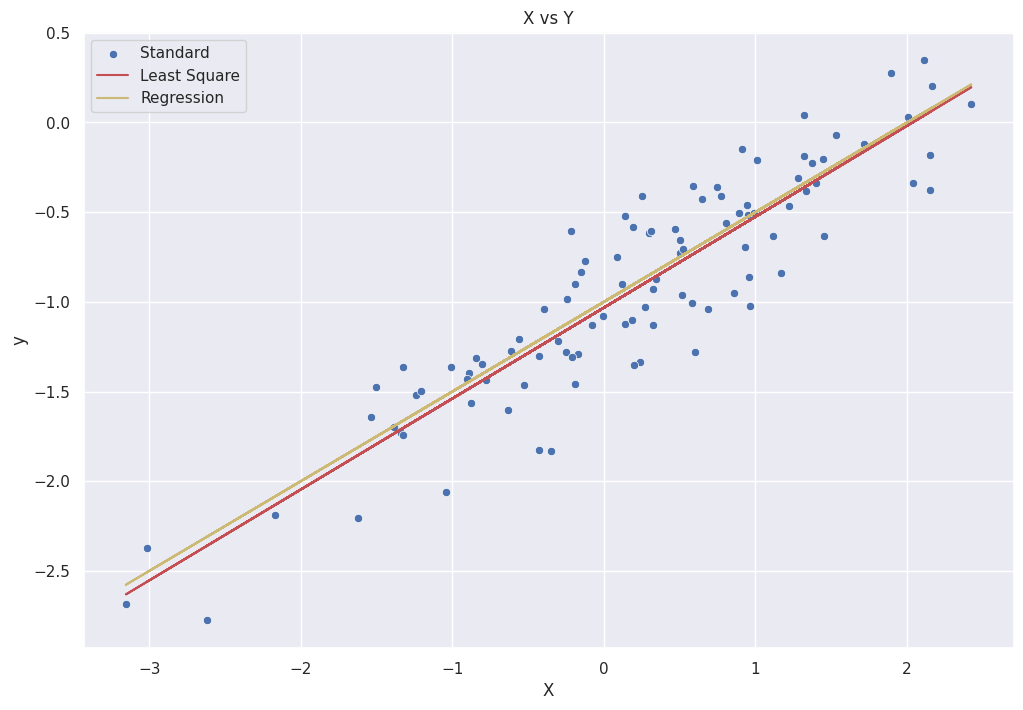

In [ ]:

y_predict = model.predict()
y_regression = -1 + 0.5 * X

plt.figure(figsize= (12,8))
ax = sns.scatterplot(x= X, y = Y)
plt.xlabel('X')
plt.ylabel('y')
plt.title("X vs Y")

ax.plot(X, y_predict, color = 'r')
ax.plot(X, y_regression, color = 'y')

ax.legend(['Standard', 'Least Square', 'Regression'])



(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model ft? Explain your answer.

In [ ]:
data = pd.DataFrame({'x': X, 'y':Y})
f1 = 'Y ~ X'
f2 = 'Y~ X + np.power(X,2)'
r1 = smf.ols(f1, data = data).fit()
r2 = smf.ols(f2, data = data).fit()
print(r1.summary(), r2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     481.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.29e-39
Time:                        19:10:15   Log-Likelihood:                -6.8758
No. Observations:                 100   AIC:                             17.75
Df Residuals:                      98   BIC:                             22.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.027    -38.899      0.0

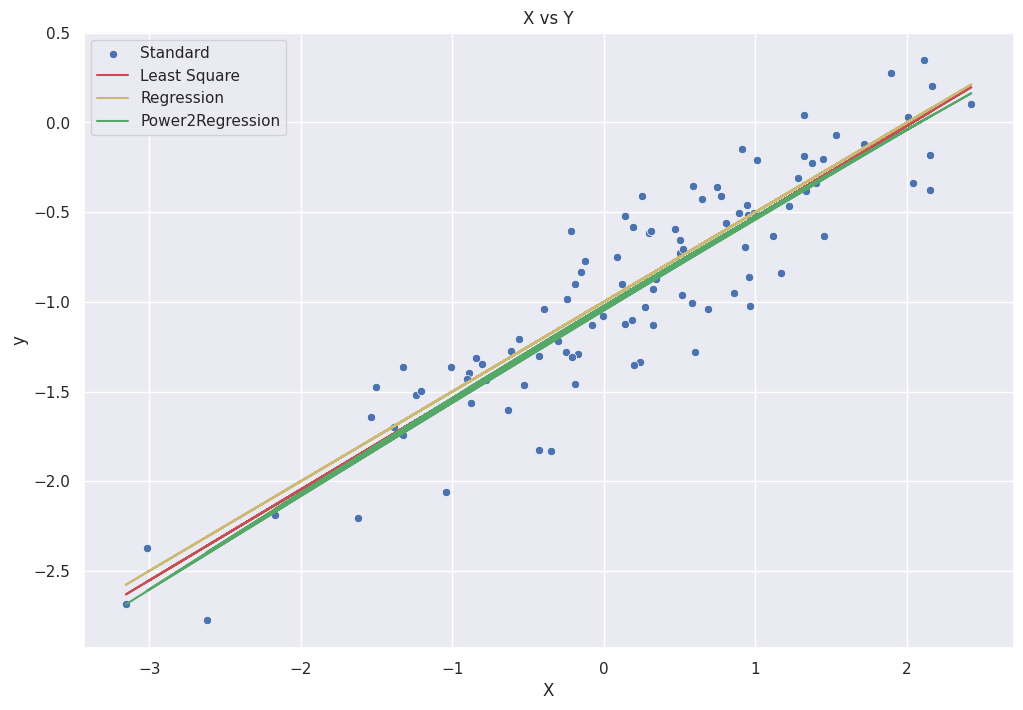

In [ ]:
y_predict = r1.predict()
y_pow_predict = r2.predict()
y_regression = -1 + 0.5 * X

plt.figure(figsize= (12,8))
ax = sns.scatterplot(x= X, y = Y)
plt.xlabel('X')
plt.ylabel('y')
plt.title("X vs Y")

ax.plot(X, y_predict, color = 'r')
ax.plot(X, y_regression, color = 'y')
ax.plot(X, y_pow_predict, color = 'g')

ax.legend(['Standard', 'Least Square', 'Regression', 'Power2Regression'])

The pow seems to have a high p value making it insignificant along with not increasing the R^2 value for the fit. Also plotting it shows no real change or significance!

(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
" in (b). Describe your results.

Size of Y:  100
These are the results:                              OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.169e+04
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.10e-130
Time:                        19:29:12   Log-Likelihood:                 228.21
No. Observations:                 100   AIC:                            -452.4
Df Residuals:                      98   BIC:                            -447.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

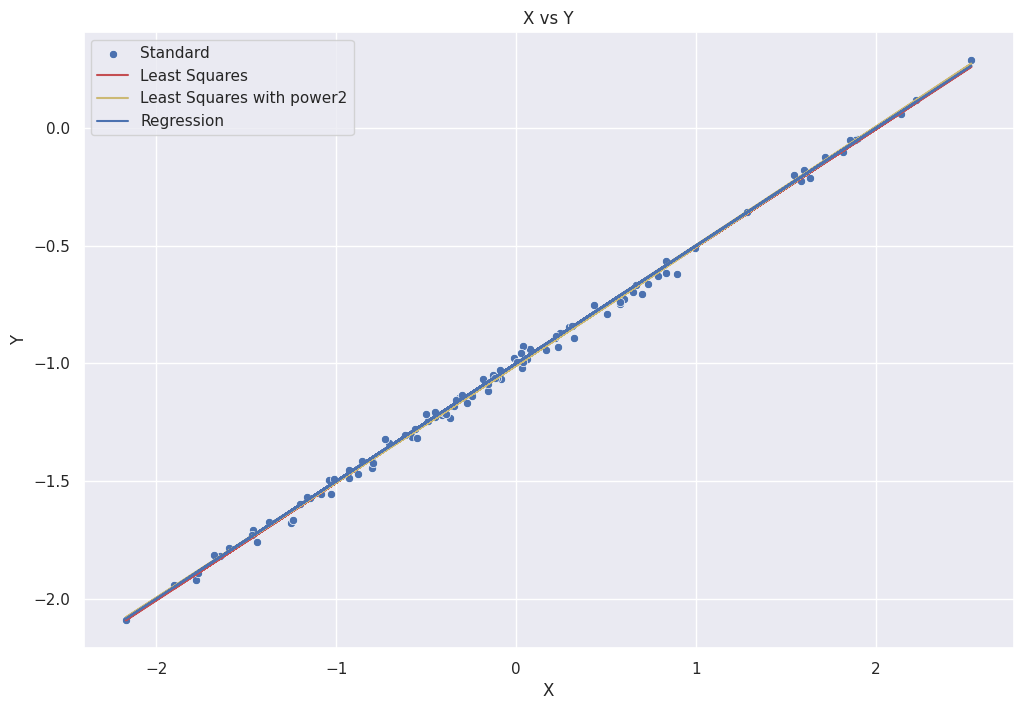

In [ ]:
X = np.random.normal(loc = 0, scale = 1, size = 100 )
eps = np.random.normal(loc = 0, scale =.025, size = 100)
Y = -1 + .5*X + eps
#size of y
print("Size of Y: ", Y.size)

data = pd.DataFrame({'x':X, 'y':Y})

results = smf.ols('Y ~ X', data = data).fit()
print("These are the results: ", results.summary())

results2 = smf.ols('Y ~ X + np.power(X,2)', data = data).fit()
print("These are the results for power2 regression", results2.summary())

plt.figure(figsize= (12,8))
ax = sns.scatterplot(x= X, y = Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

ax.plot(X, results.predict(), color = 'r')
ax.plot(X, results2.predict(), color = 'y')
ax.plot(X, -1 + 0.5*X, color = 'b')
ax.legend(['Standard', 'Least Squares', 'Least Squares with power2', 'Regression'])




Reducing this variance has resulted in a higher R^2 value. It has risen from .81 to .9998. We can also see this on our graph as our least squared lines better fit the data!

(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.

Size of Y:  100
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           6.53e-07
Time:                        19:39:54   Log-Likelihood:                -147.28
No. Observations:                 100   AIC:                             298.6
Df Residuals:                      98   BIC:                             303.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1127      0.107    

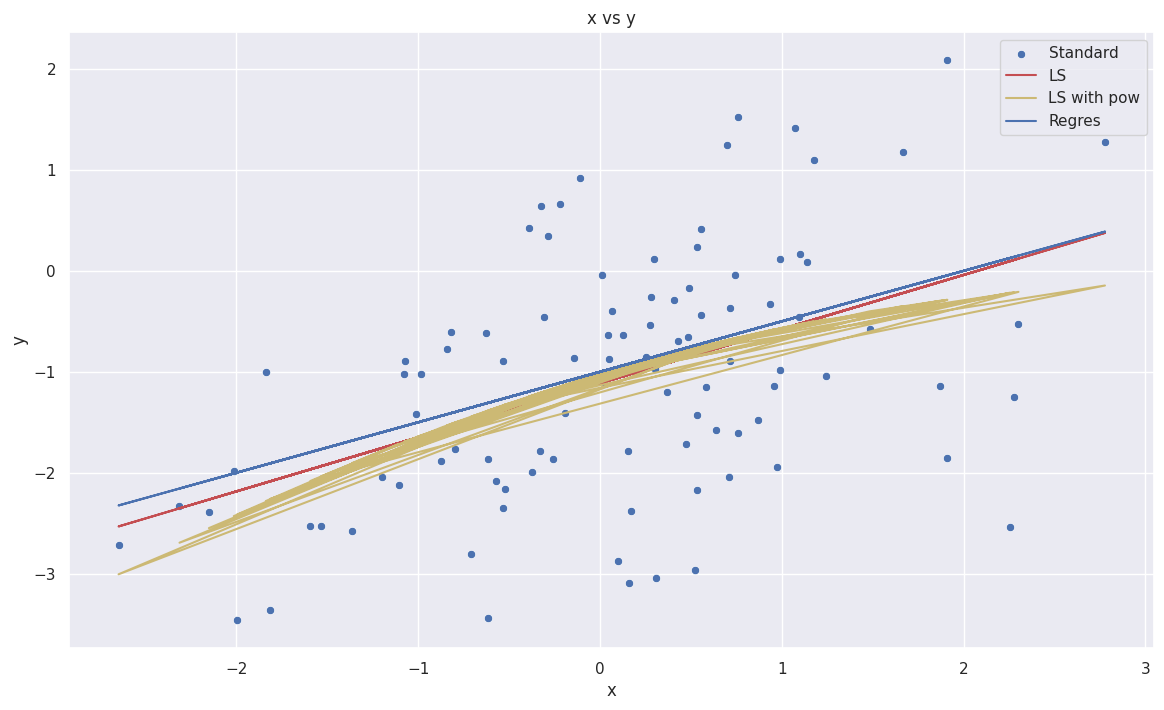

In [ ]:
X = np.random.normal(loc = 0, scale = 1, size = 100 )
eps = np.random.normal(loc = 0, scale =.95, size = 100)
Y = -1 + (.5*X) + eps
#size of y
print("Size of Y: ", Y.size)

data = pd.DataFrame({'x': X,'y':Y})
r1 = smf.ols('Y~X', data = data).fit()
r2 = smf.ols('Y~X + np.square(X)', data = data).fit()
print(r1.summary(), r2.summary())

plt.figure(figsize = (14,8))
ax = sns.scatterplot(x = X, y = Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

ax.plot(X, r1.predict(), color = 'r')
ax.plot(X, r2.predict(), color = 'y')
ax.plot(X, -1 + (.5 * X), color = 'b')
ax.legend(['Standard', 'LS' ,'LS with pow', 'Regres'])

Our R^2 value went down to around .2. This indicates that our least square estimates do not fit the data very well. As we can see from our three lines this is indeed true. So more variance than less fit regression!

(j) What are the confdence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

Noise is :    

Intercept -1.280      -0.765
X          0.338       0.737

Less Noise :     

Intercept  -1.088      -0.958
X           0.460       0.552

Original :     

Intercept	-1.085	-0.980
X	         0.461	0.553

The more variance the larger the interval of confidence, the less variance then the tighter the interval. We can see this from the above based on the intercept and X value.

# Question 14
This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:


In [4]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefcients?

Bo = 2

B1 = 2

B2 = 0.3

B0 + B1x1 + B2x2 = Y

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

0.772324497691354
          x1        x2         y
x1  1.000000  0.772324  0.530531
x2  0.772324  1.000000  0.471356
y   0.530531  0.471356  1.000000


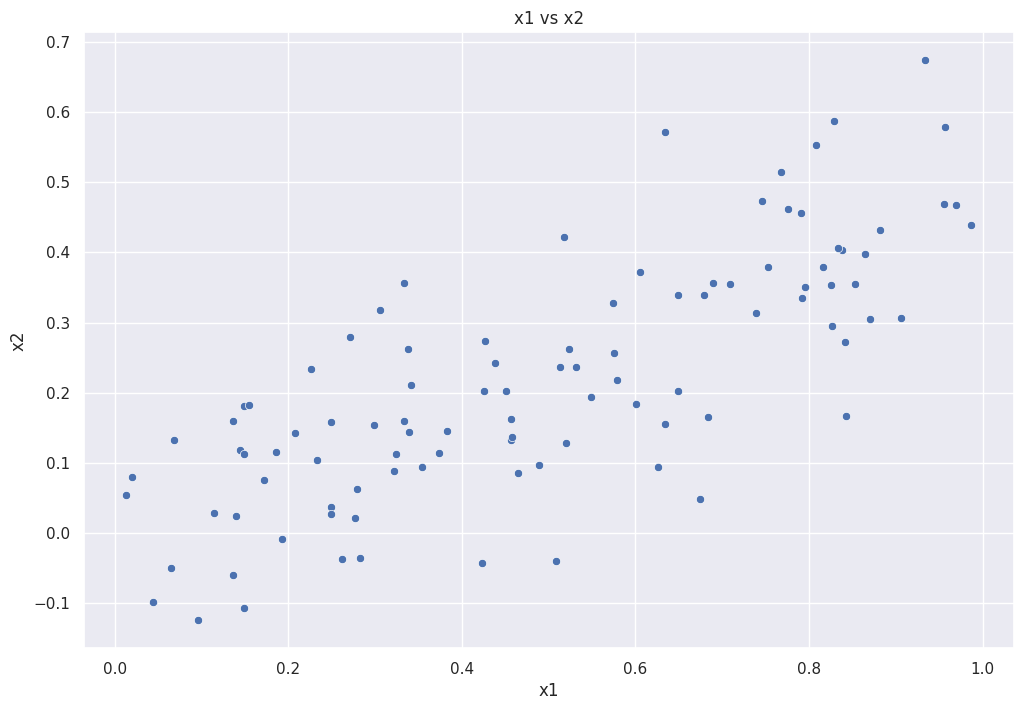

In [12]:
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = x1, y = x2, data = data)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')
print(np.corrcoef(x1,x2)[0][1])
print(data.corr())


The variables x1 and x2 are strongly correlated. We can see this in two ways.

1) The graph where the points are similar

2)The correlation coef is high at .78

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

In [13]:
results = smf.ols('y ~ x1 + x2', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           5.76e-08
Time:                        18:28:59   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that B0 is 1.9579 which is close to 2 are actual value!

B1 is 1.62 which is close to the actual value at 2.

B2 is .9428 which is a little far away from 0.3. It is the least acccurate.

We can most certainly reject the null hypothesis as a whole since our f statistic is high.

We can reject the null hypothesis for x1 since our P value is low. However our p value is a little high for x2, so unsure if we can reject it.



(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?


In [14]:
results = smf.ols('y ~ x1', data= data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.37e-08
Time:                        18:34:03   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can most certianly reject the null hypothesis as our F statistic is high and our p value is extremely low.

Our B0 and B1 values are also more accurate now!However our R value did decrease by .01 which isnt very significant.

(e) Now ft a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

In [15]:
results = smf.ols('y ~ x2', data = data ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           7.43e-07
Time:                        18:36:52   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We would once again reject the null hypothesis since our F statistic is high and p value for x2 is low. However our R squared did significantly decrease by .06. This may be less accurate

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

Yes they do. In C we said that X2 was not significant since it had a high p value. However when tested alone its p value significantly dropped. This shows there is some correlation between the two variables which we predicted in b.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to np.concaadd this additional observation to each of x1, x2 and y.

In [16]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

Re-ft the linear models from (c) to (e) using this new data. What
efect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [19]:
data = pd.DataFrame({'x1': x1, 'x2' : x2, 'y' : y})
r1 = smf.ols('y ~ x1 + x2', data = data).fit()
r2 = smf.ols('y ~ x1', data = data).fit()
r3 = smf.ols('y ~ x2', data = data).fit()
print(r1.summary(), r2.summary(), r3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           4.60e-08
Time:                        18:45:24   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

<Axes: >

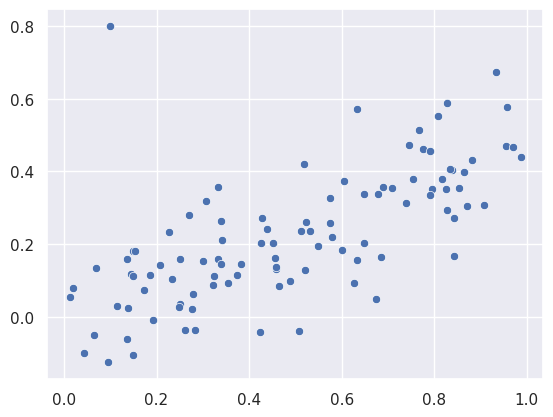

In [20]:
sns.scatterplot(x = x1, y = x2)

We can see the new point is an outlier as it is extremely far away from the linear trend. This would make sense why our B2 value is so far off in r3.

<Axes: >

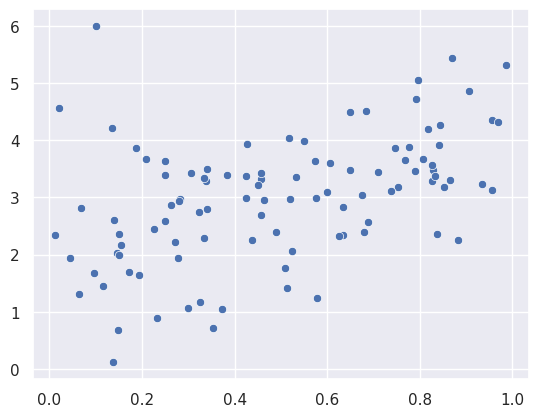

In [21]:
sns.scatterplot(x = x1, y = y)

<Axes: >

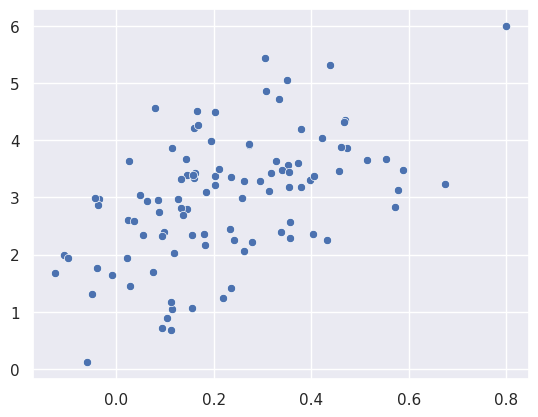

In [22]:
sns.scatterplot(x = x2, y= y)

It seems our point in X1 is normal as it doesn't go outside the range. However our point in y is an outlier based on the 1st and 2nd scatter plot. We can see how much futher away it is from the rest of the data. Our point in x2 is high leverage as we don have any x2 values in that range. This explains why our p values were kept low, and our F statistic was high. Yet our B1 and B2 coef were further off than before.

# Question 15

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically signifcant association between the predictor
and the response? Create some plots to back up your assertions.

In [23]:
Boston = load_data("Boston")

In [24]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [25]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [26]:
Boston.dropna()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [27]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                           0.007420
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                       0.931
Time:                        19:07:29   Log-Likelihood:                         -1847.6
No. Observations:                 506   AIC:                                      3697.
Df Residuals:                     505   BIC:                                      3701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

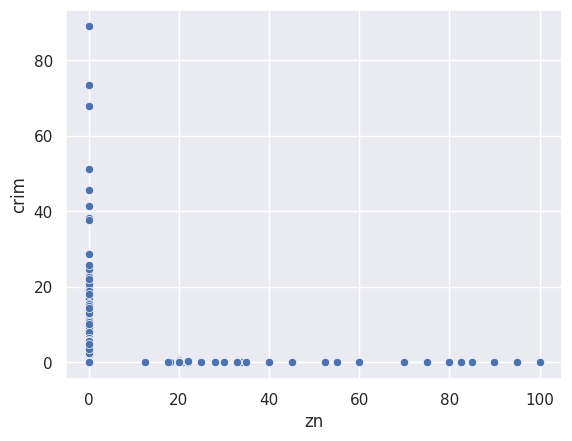

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.277
Model:                            OLS   Adj. R-squared (uncentered):              0.276
Method:                 Least Squares   F-statistic:                              193.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    1.65e-37
Time:                        19:07:30   Log-Likelihood:                         -1765.4
No. Observations:                 506   AIC:                                      3533.
Df Residuals:                     505   BIC:                                      3537.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

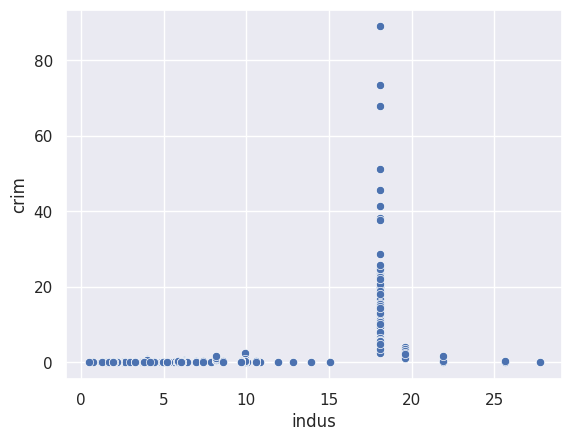

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.382
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                       0.240
Time:                        19:07:30   Log-Likelihood:                         -1846.9
No. Observations:                 506   AIC:                                      3696.
Df Residuals:                     505   BIC:                                      3700.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

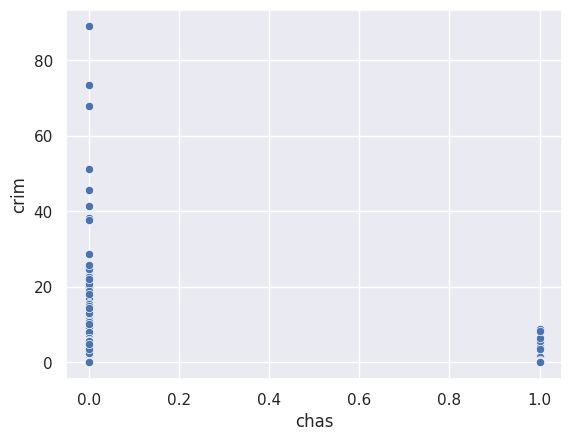

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.209
Method:                 Least Squares   F-statistic:                              134.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    9.43e-28
Time:                        19:07:31   Log-Likelihood:                         -1787.8
No. Observations:                 506   AIC:                                      3578.
Df Residuals:                     505   BIC:                                      3582.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

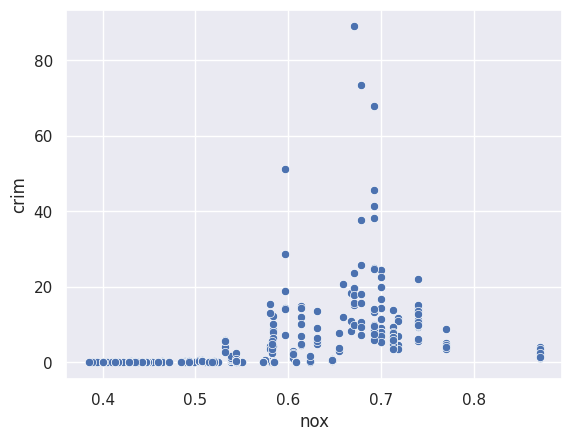

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              76.55
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    3.22e-17
Time:                        19:07:32   Log-Likelihood:                         -1811.9
No. Observations:                 506   AIC:                                      3626.
Df Residuals:                     505   BIC:                                      3630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

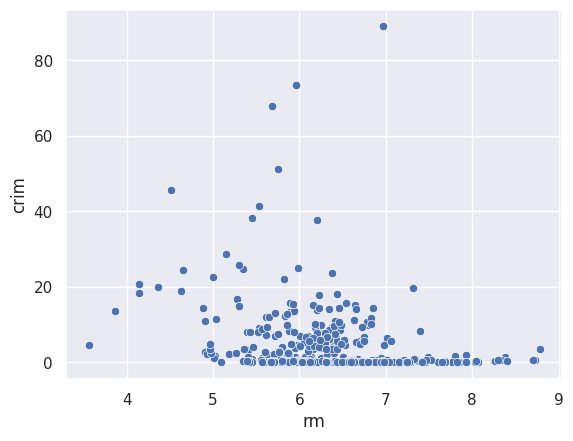

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.232
Model:                            OLS   Adj. R-squared (uncentered):              0.231
Method:                 Least Squares   F-statistic:                              152.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    7.39e-31
Time:                        19:07:32   Log-Likelihood:                         -1780.7
No. Observations:                 506   AIC:                                      3563.
Df Residuals:                     505   BIC:                                      3568.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

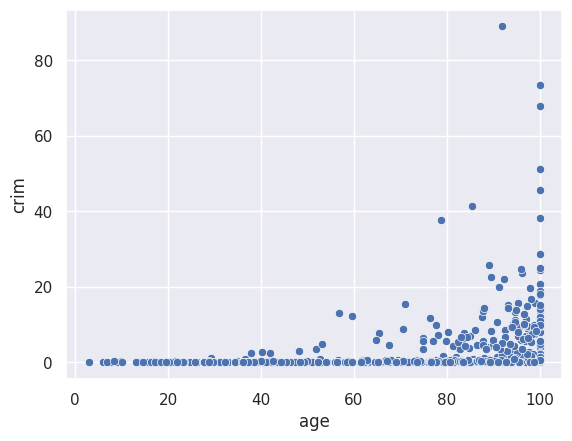

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              14.91
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    0.000127
Time:                        19:07:33   Log-Likelihood:                         -1840.2
No. Observations:                 506   AIC:                                      3682.
Df Residuals:                     505   BIC:                                      3687.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

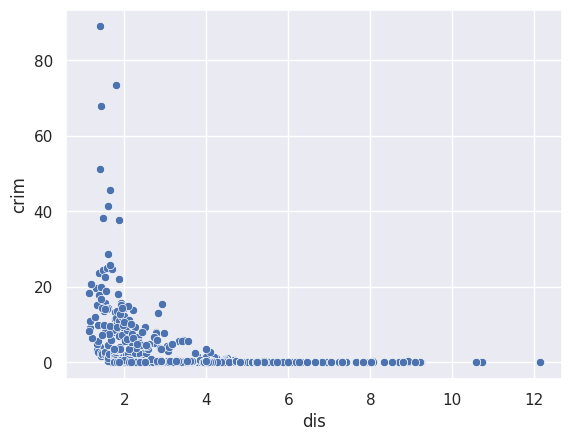

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              422.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    1.18e-68
Time:                        19:07:33   Log-Likelihood:                         -1693.8
No. Observations:                 506   AIC:                                      3390.
Df Residuals:                     505   BIC:                                      3394.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

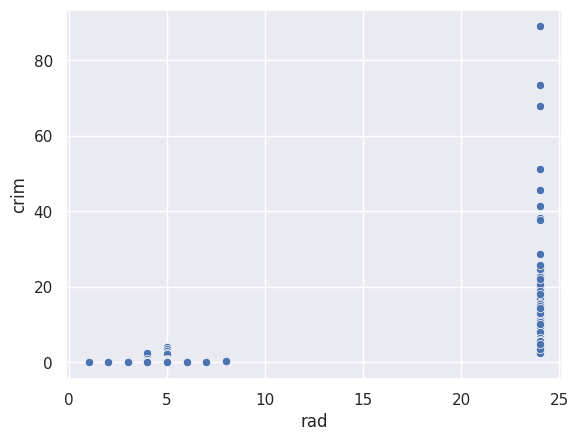

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.316
Method:                 Least Squares   F-statistic:                              234.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    9.15e-44
Time:                        19:07:33   Log-Likelihood:                         -1751.0
No. Observations:                 506   AIC:                                      3504.
Df Residuals:                     505   BIC:                                      3508.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

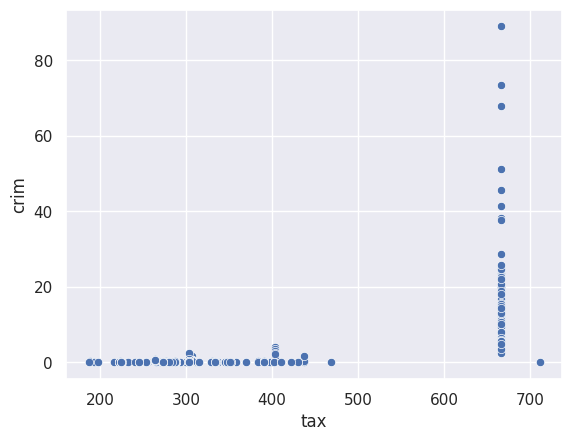

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              105.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    1.19e-22
Time:                        19:07:34   Log-Likelihood:                         -1799.5
No. Observations:                 506   AIC:                                      3601.
Df Residuals:                     505   BIC:                                      3605.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

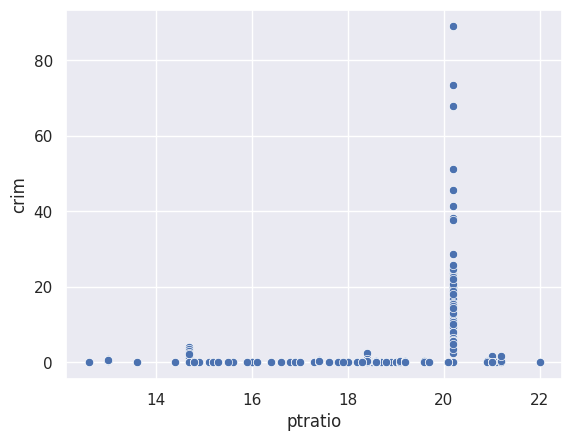

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.296
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              212.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    2.21e-40
Time:                        19:07:34   Log-Likelihood:                         -1758.8
No. Observations:                 506   AIC:                                      3520.
Df Residuals:                     505   BIC:                                      3524.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

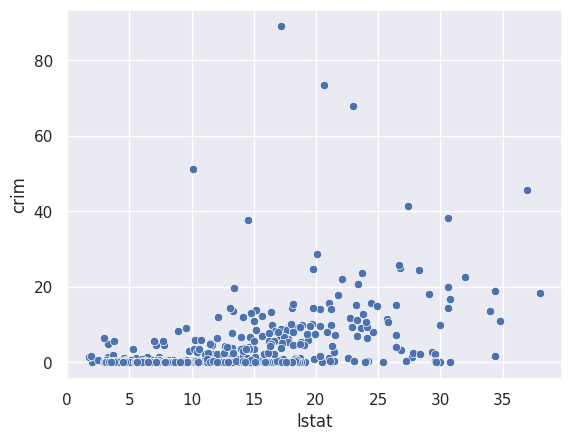

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              26.63
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    3.56e-07
Time:                        19:07:34   Log-Likelihood:                         -1834.6
No. Observations:                 506   AIC:                                      3671.
Df Residuals:                     505   BIC:                                      3675.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

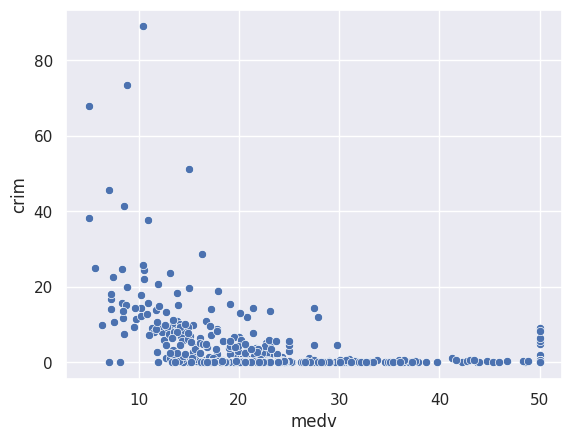

In [32]:
cols = ['zn', 'indus','chas','nox','rm','age','dis','rad','tax', 'ptratio', 'lstat', 'medv']
y = Boston['crim']
for col in cols:
  r= sm.OLS(y, Boston[col]).fit()
  print(r.summary())
  sns.scatterplot(x = Boston[col], y =y)
  plt.show()

Looks like everything is signifcant except for ZN and chas based on our p values and graphs!

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?


In [33]:
predictors = " + ".join(cols)
rOverall = sm.OLS(y, Boston[cols]).fit()
rOverall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   crim   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              46.14
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    7.69e-73
Time:                        19:11:36   Log-Likelihood:                         -1657.4
No. Observations:                 506   AIC:                                      3339.
Df Residuals:                     494   BIC:                                      3389.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zn             0.0450      0.019      2.391      0.017       0.008       0.082
indus         -0.0699      0.084     -0.835      0.404      -0.234       0.095
chas          -0.8568      1.187     -0.722      0.471      -3.188       1.475
nox           -4.0431      4.341     -0.931      0.352     -12.573       4.487
rm             1.2173      0.528      2.306      0.022       0.180       2.254
age           -0.0033      0.018     -0.182      0.856      -0.039       0.032
dis           -0.7762      0.256     -3.034      0.003      -1.279      -0.274
rad            0.5523      0.082      6.725      0.000       0.391       0.714
tax           -0.0023      0.005     -0.444      0.657      -0.012       0.008
ptratio       -0.0598      0.138     -0.433      0.665      -0.331       0.212
lstat          0.1966      0.070      2.814      0.005       0.059       0.334
medv          -0.1797      0.056     -3.194      0.001      -0.290      -0.069
==============================================================================
Omnibus:                      663.243   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80159.962
Skew:                           6.580   Prob(JB):                         0.00
Kurtosis:                      63.240   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
rOverall2 = smf.ols('crim ~ {}'.format(predictors), data = Boston).fit()
rOverall2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           2.03e-56
Time:                        19:13:29   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

WE can reject the null hypothesis for sure since our F statistic is 33.52.

Now for variables dis, rad, and medv. I would say we can reject the null hypothesis since these all have basically 0 p values. Some variables that need investigated more would be lstat, nox, and zn as there p values are also low but not zero.

(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefcients
from (a) on the x-axis, and the multiple regression coefcients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate
in the multiple linear regression model is shown on the y-axis.

In [49]:
multi = [rOverall2.params[col] for col in cols]


In [50]:
single = []
for col in cols:
  r= sm.OLS(y, Boston[col]).fit()
  single.append(r.params[0])

12

Text(0.5, 1.0, 'single vs multi regression')

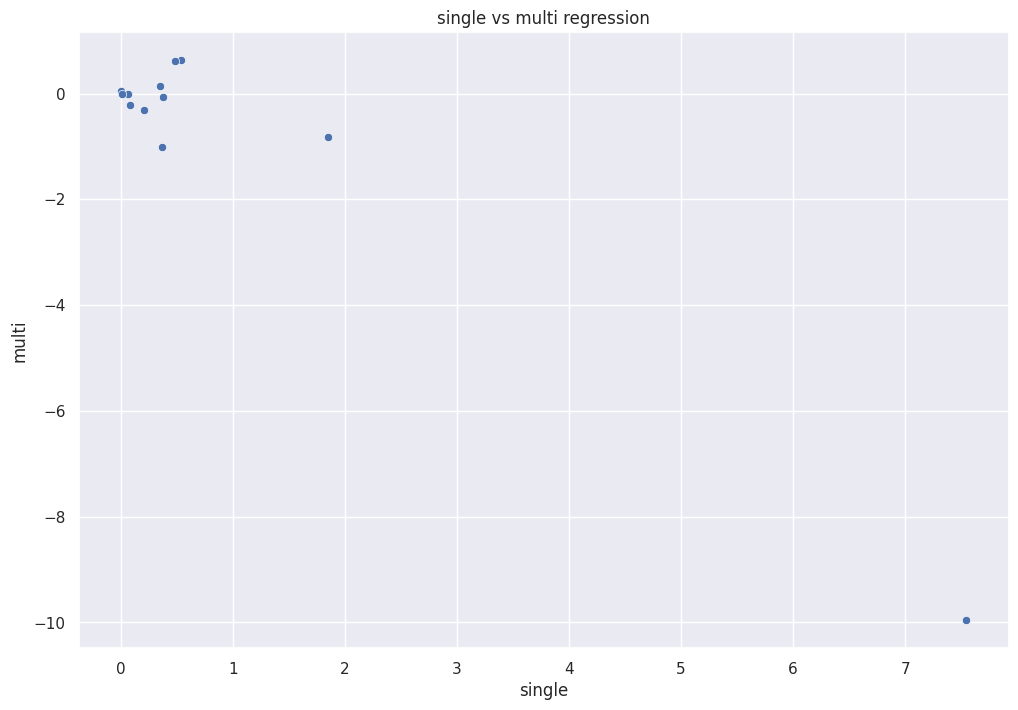

In [52]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = single, y = multi)
plt.xlabel('single')
plt.ylabel('multi')
plt.title('single vs multi regression')

It seems the coef stayed rather the same for most of the variables except for 2-3 variables changed drastically.

(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X^2 + β3X^3 + e".

In [53]:
for col in cols:
  r = smf.ols('crim ~ {0} + np.power({0}, 2) + np.power({0} , 3)'.format(col), data = Boston).fit()
  print(r.summary())
  print()
  print("-------------------------------------------------------------------")
  print()



                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.28e-06
Time:                        19:32:44   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

In [57]:

models = [smf.ols('crim ~ {0} + np.power({0}, 2) + np.power({0} , 3)'.format(col), data = Boston).fit() for col in cols]

In [63]:
ans = pd.concat([model.pvalues[model.pvalues <0.05] for model in models])
ans


Intercept               4.113000e-26
zn                      2.612296e-03
Intercept               2.036526e-02
indus                   5.297064e-05
np.power(indus, 2)      3.420187e-10
np.power(indus, 3)      1.196405e-12
Intercept               1.239505e-19
Intercept               1.311939e-11
nox                     2.758372e-13
np.power(nox, 2)        6.811300e-15
np.power(nox, 3)        6.961110e-16
np.power(age, 2)        4.737733e-02
np.power(age, 3)        6.679915e-03
Intercept               1.633088e-30
dis                     6.374792e-18
np.power(dis, 2)        4.941214e-12
np.power(dis, 3)        1.088832e-08
Intercept               2.462124e-03
ptratio                 3.028663e-03
np.power(ptratio, 2)    4.119552e-03
np.power(ptratio, 3)    6.300514e-03
Intercept               3.989088e-46
medv                    2.637707e-28
np.power(medv, 2)       3.260523e-18
np.power(medv, 3)       1.046510e-12
dtype: float64

There is several significant cells with a p value less than 0.05!